# SMARTCAB PROJECT

### To implement Q learning we need to define ###
* State Space
* The Learning Rate- Alpha
* Discount factor - Gamma
* Epsilon

### Defining the State Space

The state space can be defined based of the inputs that are sensed.
* Lights- Green or Red
* Oncoming - forward or None
* Left - Left or none
* Next Way Point- Left, Forward, Right, None



The next way-point points the car towards the direction of the destination. So it is crucial. The other chosen variables are chosen so as to follow the traffic rules(**Lights**) and inorder to ensure that the car dosent crash with the other cars(**Oncoming and Left**). 


STATE= ( Color of Traffic Light, 
Is there an oncoming vehicle?,
Any Vehicle on the Right?, 
What direction is the destination?)

### NEW VARIABLES INITLAIZED

### The Learning Rate- Alpha

The learning rate determines to what extent the newly acquired information will override the old information. A factor of 0 will make the agent not learn anything, while a factor of 1 would make the agent consider only the most recent information. In fully deterministic environments, a learning rate of **alpha = 1** is optimal. 


When the problem is stochastic, the algorithm still converges under some technical conditions on the learning rate, that require it to decrease to zero. In practice, often a constant learning rate is used.

In our case we choose alpha=1

### Discount factor - Gamma

The discount factor **gamma**  determines the importance of future rewards. 

A factor of 0 will make the agent "myopic" (or short-sighted) by only considering current rewards, while a factor approaching 1 will make it strive for a long-term high reward. 

If the discount factor meets or exceeds 1, the action values may diverge. For gamma =1, without a terminal state, or if the agent never reaches one, all environment histories will be infinitely long, and utilities with additive, undiscounted rewards will generally be infinite.

### Exploration -Exploitation value-Epsilon 

We introduce an additional term, epsilon. We then randomly generate a value, and if that value is less than epsilon, a random action is chosen, instead of following our normal tactic of choosing the max Q.

The best strategy to choose a vale of epsilon is to start from a high value close to 1 and allow it to decay over time. This would be an optimal choice because initially we want the agent to explore a lot and build the Q learning state space and when and all the states are explore we can confidently say that a random action may not be able to produce a higher Q value compared to the Q max  defned in the state space.


## Simulation Details:

### Finding the optimal policy
* Optimal route can be defined as the shortest path to destination without violating the traffic rules and hitting other cars. This is clearly not possible to model in our case since we cannot attach  a permanent 'q- value'to a state even after infinite iterations because the traffic lights are stochastic and cannot be predicted before hand.
* Optimal policy is determined by quantizing the enviorment to states and calculating the q-value for each state


### Selecting action according to your policy

#### 1. When you are exploring

Pick a random action among
   * Do nothing
   * Move Left
   * Move Right
   * Move Forward

#### 2. When you are exploiting

**If state has been previously encountered**- 
* Choose the action that maximizes the reward
* If there are multiple actions with same reward then pick a random action among them







**If state has not been previously encountered**-
* Pick a random action among
         * Do nothing
         * Move Left
         * Move Right
         * Move Forward

* Q Update= Q0 for all the actions   



### Q-Learning Formula

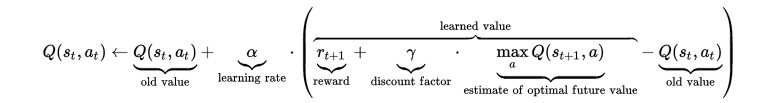

In [9]:
from IPython.display import Image 
Image(filename='image.png')
### The equation that was used.

Before learning has started, ** Q ** returns a fixed value(10). Then, each time the agent selects an action, and observes a reward and a new state that may depend on both the previous state and the selected action,** Q** is updated.

The core of the algorithm is a simple value iteration update. It assumes the old value and makes a correction based on the new information.

### Rewards

Positive Rewards
* Valid non-null move=  2
* Valid null move = 0.0
* Reached deadline = 10


Penalties
* Invalid move=-1.0


### Performance of  Enhanced the driving agent

The driving agent was enhanced by the Q learning process


### Alpha= 0.5, Gamma=0

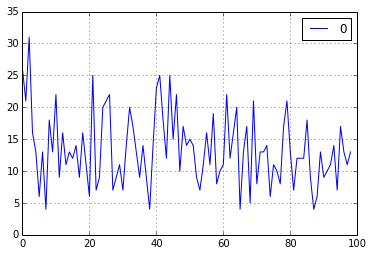

In [6]:
from IPython.display import Image 
Image(filename='counts_0.5_decay_0_.png')

* Average number of Steps to Reach destination=15.11

### Alpha=0.5, Gamma=1

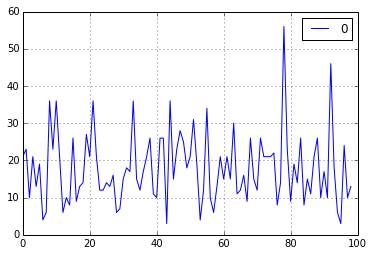

In [11]:
Image(filename='counts _0.5_decay_1_.png')

* Average number of Steps to Reach destination=12.424242

### Alpha=0, Gamma=1

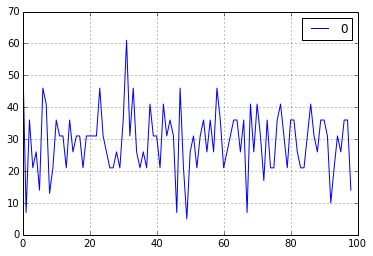

In [13]:
Image(filename='counts_0_decay_1.png')

* Average number of Steps to Reach destination=29.43

### Conclusion

In the current implementation:
    * High alpha(=1) is optimal
    * Gamma does not impact the performance so much.

In [16]:
### The final Q_ table obtained is of the form

In [17]:
Q={('red', 'right', None, 'forward'): {'forward': 33.5, 'left': 10, 'right': 10, None: 10}, ('red', 'left', None, 'forward'): {'forward': 10, 'left': 10, 'right': 9.5, None: 10}, ('green', None, 'right', 'left'): {'forward': 10, 'left': 14.0, 'right': 10, None: 10}, ('red', None, 'left', 'left'): {'forward': 10, 'left': 10, 'right': 39.0, None: 10}, ('red', None, 'forward', 'right'): {'forward': 10, 'left': 10, 'right': 25.0, None: 10}, ('green', None, 'forward', 'forward'): {'forward': 30.0, 'left': 10, 'right': 10, None: 10.0}, ('red', None, None, 'right'): {'forward': 9.0, 'left': 9.0, 'right': 63.0, None: 10}, ('green', None, 'left', 'forward'): {'forward': 10, 'left': 10, 'right': 53.5, None: 10}, ('green', None, None, 'right'): {'forward': 9.5, 'left': 9.5, 'right': 48.0, None: 10.0}, ('red', None, 'forward', 'forward'): {'forward': 53.0, 'left': 9.0, 'right': 10, None: 10}, ('green', None, 'forward', 'right'): {'forward': 11.5, 'left': 10, 'right': 10, None: 10}, ('green', None, 'left', 'left'): {'forward': 75.0, 'left': 10, 'right': 10, None: 10}, ('red', None, 'left', 'forward'): {'forward': 10, 'left': 10, 'right': 47.5, None: 10}, ('red', 'forward', None, 'forward'): {'forward': 40.5, 'left': 10, 'right': 10, None: 10.0}, ('red', None, 'forward', 'left'): {'forward': 10, 'left': 10, 'right': 43.5, None: 10}, ('red', 'right', None, 'right'): {'forward': 10, 'left': 37.0, 'right': 10, None: 10}, ('green', None, None, 'left'): {'forward': 9.5, 'left': 57.5, 'right': 9.5, None: 10}, ('red', None, None, 'forward'): {'forward': 9.0, 'left': 9.0, 'right': 9.5, None: 61.0}, ('green', None, None, 'forward'): {'forward': 63.0, 'left': 9.5, 'right': 10, None: 10}, ('red', None, None, 'left'): {'forward': 9.0, 'left': 9.0, 'right': 9.5, None: 57.0}, ('red', None, 'right', 'forward'): {'forward': 10, 'left': 10, 'right': 11.5, None: 10}}
print Q

{('red', 'right', None, 'right'): {'forward': 10, 'right': 10, None: 10, 'left': 37.0}, ('green', None, 'right', 'left'): {'forward': 10, 'right': 10, None: 10, 'left': 14.0}, ('red', 'right', None, 'forward'): {'forward': 33.5, 'right': 10, None: 10, 'left': 10}, ('red', None, 'forward', 'right'): {'forward': 10, 'right': 25.0, None: 10, 'left': 10}, ('green', None, None, 'right'): {'forward': 9.5, 'right': 48.0, None: 10.0, 'left': 9.5}, ('red', None, None, 'right'): {'forward': 9.0, 'right': 63.0, None: 10, 'left': 9.0}, ('green', None, 'left', 'forward'): {'forward': 10, 'right': 53.5, None: 10, 'left': 10}, ('green', None, 'forward', 'forward'): {'forward': 30.0, 'right': 10, None: 10.0, 'left': 10}, ('red', 'forward', None, 'forward'): {'forward': 40.5, 'right': 10, None: 10.0, 'left': 10}, ('green', None, 'forward', 'right'): {'forward': 11.5, 'right': 10, None: 10, 'left': 10}, ('green', None, 'left', 'left'): {'forward': 75.0, 'right': 10, None: 10, 'left': 10}, ('red', 'left'